In [597]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [598]:
df=pd.read_csv("income_evaluation.csv")
df.shape

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


(32561, 15)

In [599]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [601]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [602]:
df.columns = [x.replace(' ','') for x in df.columns]
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [603]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [604]:
for col in df.columns:
    print(df[col].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Pr

In [605]:
df=df.replace(' ?', np.NAN)

In [606]:
df=df.dropna()

In [607]:
df.shape

(30162, 15)

In [608]:
for col in df.drop(["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"],axis=1):
    df[col]=[x.replace(' ','') for x in df[col]]

In [609]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

<AxesSubplot:>

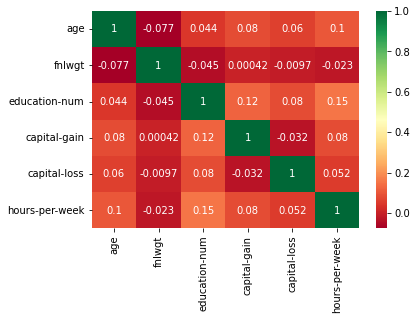

In [610]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

<AxesSubplot:>

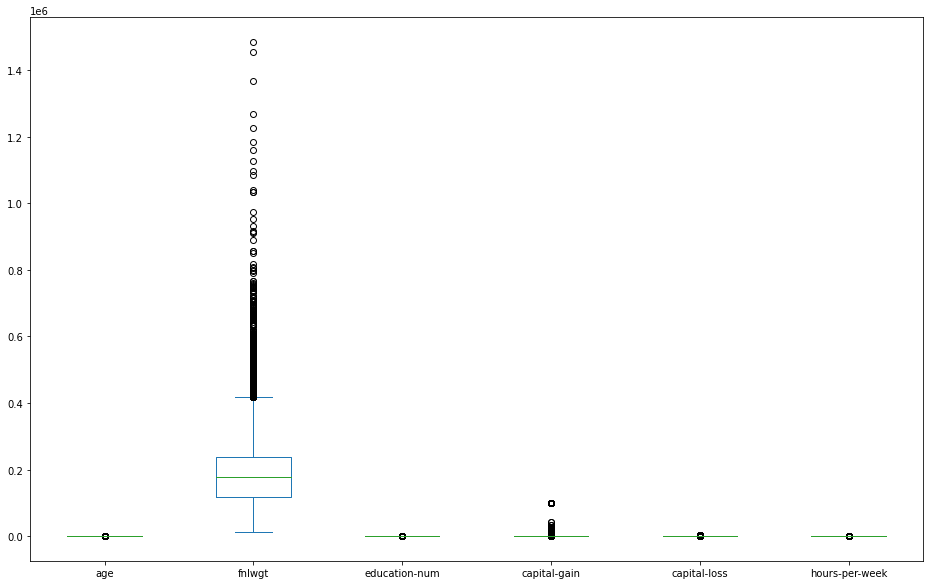

In [611]:
df.plot(kind="box", figsize = (16,10))

In [612]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i < lwr_bound or i > upr_bound):
            outliers.append(i)
    return outliers
for i in ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]:
    sample_outliers = detect_outliers_iqr(df[i])
    print("Outliers from IQR method: ", len(sample_outliers))

Outliers from IQR method:  169
Outliers from IQR method:  903
Outliers from IQR method:  196
Outliers from IQR method:  2538
Outliers from IQR method:  1427
Outliers from IQR method:  7953


In [613]:
from sklearn.preprocessing import LabelEncoder
df2 = df.apply(LabelEncoder().fit_transform)

In [614]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df2)
df2=transformer.transform(df2)
df2=pd.DataFrame(df2,columns=df.columns)

In [615]:
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.105263,3.0,-0.758096,-0.666667,0.75,1.0,-0.857143,0.000000,0.0,0.0,24.0,0.0,0.0,0.0,0.0
1,0.684211,2.0,-0.733242,-0.666667,0.75,0.0,-0.428571,-0.333333,0.0,0.0,0.0,0.0,-5.4,0.0,0.0
2,0.052632,0.0,0.368438,0.000000,-0.25,-1.0,-0.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.842105,0.0,0.491233,-3.333333,-0.75,0.0,-0.142857,-0.333333,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.473684,0.0,0.887842,-0.666667,0.75,0.0,0.428571,1.333333,-2.0,-1.0,0.0,0.0,0.0,-34.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,-0.526316,0.0,0.608867,-1.333333,0.50,0.0,0.857143,1.333333,0.0,-1.0,0.0,0.0,-0.4,0.0,0.0
30158,0.157895,0.0,-0.224791,0.000000,-0.25,0.0,0.000000,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30159,1.105263,0.0,-0.243536,0.000000,-0.25,2.0,-0.857143,1.000000,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
30160,-0.789474,0.0,0.249645,0.000000,-0.25,1.0,-0.857143,0.666667,0.0,0.0,0.0,0.0,-4.0,0.0,0.0


<AxesSubplot:>

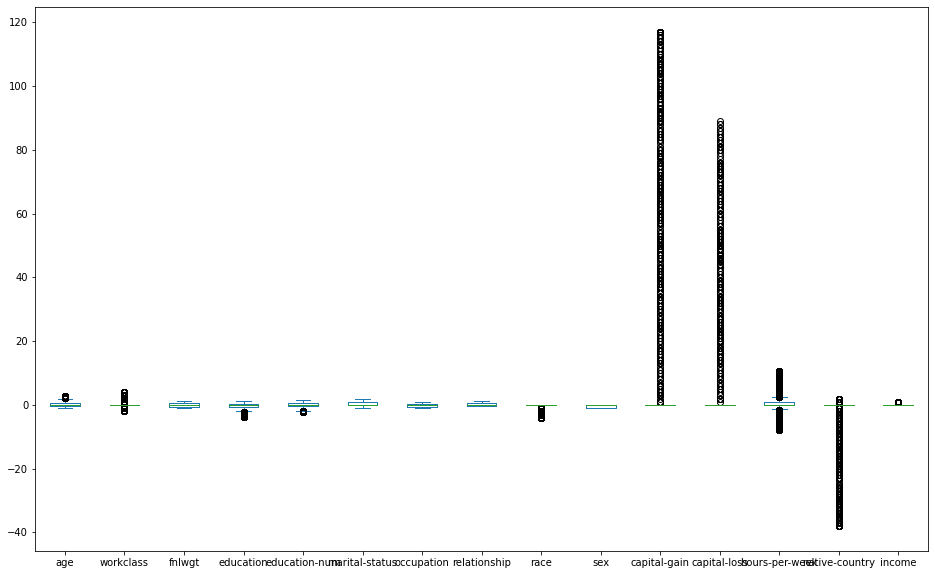

In [616]:
df2.plot(kind = "box", figsize = (16,10))

In [617]:
df2.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [618]:
df2.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [619]:
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.105263,3.0,-0.758096,-0.666667,0.75,1.0,-0.857143,0.000000,0.0,0.0,24.0,0.0,0.0,0.0,0.0
1,0.684211,2.0,-0.733242,-0.666667,0.75,0.0,-0.428571,-0.333333,0.0,0.0,0.0,0.0,-5.4,0.0,0.0
2,0.052632,0.0,0.368438,0.000000,-0.25,-1.0,-0.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.842105,0.0,0.491233,-3.333333,-0.75,0.0,-0.142857,-0.333333,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.473684,0.0,0.887842,-0.666667,0.75,0.0,0.428571,1.333333,-2.0,-1.0,0.0,0.0,0.0,-34.0,0.0


In [620]:
from sklearn.model_selection import train_test_split
X=df2.drop(["income"],axis=1)
Y=df2["income"]
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=123)

In [621]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
y_pred1 = regressor.predict(X_test)
accuracy_score(y_test, y_pred1)*100

C:\Users\elnur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


82.47969501077408

In [622]:

from sklearn.naive_bayes import GaussianNB #Naive bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.8141886292060335


In [623]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=42)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)

0.779877341289574

In [635]:
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(ppn, X,Y, cv=5)
score_ppn.mean()

0.7603603258998584

In [625]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier #Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8566219128128626


In [626]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier #KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.8390518813194099


In [627]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred1));

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4541
         1.0       0.72      0.47      0.57      1492

    accuracy                           0.82      6033
   macro avg       0.78      0.71      0.73      6033
weighted avg       0.81      0.82      0.81      6033



In [632]:
print(confusion_matrix(y_test, y_pred1))

[[4273  268]
 [ 789  703]]


In [631]:
df2.income.value_counts()

0.0    22654
1.0     7508
Name: income, dtype: int64

In [633]:
df2.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,0.075552,0.199324,0.014293,-0.222079,0.030328,0.290067,-0.005736,0.139447,-0.321398,-0.324315,6.552450,2.072641,0.174305,-1.617433,0.248922
std,0.690808,0.953925,0.597232,1.270764,0.637499,0.749008,0.575652,0.533779,0.834709,0.468126,23.284819,10.028470,2.354365,6.105372,0.432396
min,-1.052632,-2.000000,-1.020431,-3.666667,-2.250000,-1.000000,-0.857143,-0.333333,-4.000000,-1.000000,0.000000,0.000000,-7.800000,-38.000000,0.000000
25%,-0.473684,0.000000,-0.491206,-0.666667,-0.250000,0.000000,-0.571429,-0.333333,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.526316,0.000000,0.508794,0.333333,0.750000,1.000000,0.428571,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.684211,4.000000,1.113422,1.333333,1.500000,2.000000,1.000000,1.333333,0.000000,0.000000,117.000000,89.000000,10.800000,2.000000,1.000000
